<a href="https://colab.research.google.com/github/IsaiQuint/SS_INNOVA/blob/main/HeartDisease%2C_Isa%C3%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRERÍAS**

In [92]:
#hola
pip install squarify

In [93]:
pip install imbalanced-learn

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sb
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import shapiro, pearsonr
from scipy.stats import kruskal
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


# **INTRODUCCIÓN A LA DATA**


Exploración de los datos y la infromación general del datset.

In [95]:
train= pd.read_csv('train.csv')
train.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,Yes,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Good,360 min,No,No,No,No
1,Patient_196414,37.59,Yes,No,No,7.0,20.0,No,Female,30-34,Hispanic,No,Yes,Very good,480 min,No,No,No,No
2,Patient_107743,19.37,Yes,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Good,2 hrs,No,No,No,No
3,Patient_28303,48.42,No,No,No,30.0,15.0,No,Female,30-34,White,No,Yes,Fair,8 hrs,No,No,No,No
4,Patient_118489,27.12,No,No,No,0.0,5.0,No,Male,65-69,White,No,Yes,Very good,360 min,Yes,No,No,No


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223856 entries, 0 to 223855
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Patient_ID        223856 non-null  object 
 1   BMI               223856 non-null  float64
 2   Smoking           223856 non-null  object 
 3   AlcoholDrinking   223856 non-null  object 
 4   Stroke            223856 non-null  object 
 5   PhysicalHealth    223856 non-null  float64
 6   MentalHealth      223856 non-null  float64
 7   DiffWalking       223856 non-null  object 
 8   Sex               223856 non-null  object 
 9   AgeCategory       223856 non-null  object 
 10  Race              223856 non-null  object 
 11  Diabetic          223856 non-null  object 
 12  PhysicalActivity  223856 non-null  object 
 13  GenHealth         223856 non-null  object 
 14  SleepTime         223856 non-null  object 
 15  Asthma            223856 non-null  object 
 16  KidneyDisease     22

In [97]:
train["Smoking"].value_counts()

Smoking
No     131578
Yes     92278
Name: count, dtype: int64

In [98]:
train["AlcoholDrinking"].value_counts()

AlcoholDrinking
No     208595
Yes     15261
Name: count, dtype: int64

In [99]:
train["Stroke"].value_counts()

Stroke
No     215464
Yes      8392
Name: count, dtype: int64

In [100]:
train["DiffWalking"].value_counts()

DiffWalking
No     192822
Yes     31034
Name: count, dtype: int64

In [101]:
train["Sex"].value_counts()

Sex
Female    117442
Male      106414
Name: count, dtype: int64

In [102]:
train["AgeCategory"].value_counts()

AgeCategory
65-69          23794
60-64          23568
70-74          21796
55-59          20836
50-54          17814
80 or older    16956
45-49          15280
75-79          15010
40-44          14758
18-24          14708
35-39          14414
30-34          13152
25-29          11770
Name: count, dtype: int64

In [103]:
train["Race"].value_counts()

Race
White                             171653
Hispanic                           19233
Black                              16089
Other                               7606
Asian                               5598
American Indian/Alaskan Native      3677
Name: count, dtype: int64

In [104]:
train["Diabetic"].value_counts()

Diabetic
No                         188691
Yes                         28595
No, borderline diabetes      4809
Yes (during pregnancy)       1761
Name: count, dtype: int64

In [105]:
train["PhysicalActivity"].value_counts()

PhysicalActivity
Yes    173406
No      50450
Name: count, dtype: int64

In [106]:
train["GenHealth"].value_counts()

GenHealth
Very good    79591
Good         65411
Excellent    46712
Fair         24239
Poor          7903
Name: count, dtype: int64

In [107]:
train["SleepTime"].value_counts()

SleepTime
7 hrs       45705
8 hrs       45529
6 hrs       31060
480 min     22950
420 min     22682
360 min     15556
5 hrs        8953
9 hrs        7520
300 min      4482
540 min      3661
10 hrs       3622
4 hrs        3575
240 min      1873
600 min      1814
12 hrs       1023
3 hrs         944
720 min       500
180 min       452
2 hrs         374
1 hrs         255
120 min       185
11 hrs        180
60 min        130
16 hrs        116
14 hrs        116
660 min       113
15 hrs         90
840 min        56
960 min        55
18 hrs         52
900 min        50
13 hrs         47
20 hrs         36
780 min        20
1080 min       18
1200 min       15
24 hrs         12
17 hrs         11
1440 min        9
22 hrs          7
1020 min        2
1320 min        2
1260 min        1
19 hrs          1
1140 min        1
23 hrs          1
Name: count, dtype: int64

In [108]:
train["Asthma"].value_counts()

Asthma
No     193729
Yes     30127
Name: count, dtype: int64

In [109]:
train["KidneyDisease"].value_counts()

KidneyDisease
No     215604
Yes      8252
Name: count, dtype: int64

In [110]:
train["SkinCancer"].value_counts()

SkinCancer
No     203000
Yes     20856
Name: count, dtype: int64

In [111]:
train["HeartDisease"].value_counts()

HeartDisease
No     204695
Yes     19161
Name: count, dtype: int64

In [112]:
train["PhysicalHealth"].value_counts()

PhysicalHealth
0.0     158479
30.0     13590
2.0      10480
1.0       7325
3.0       6113
5.0       5324
10.0      3853
15.0      3522
7.0       3262
4.0       3153
20.0      2238
14.0      2064
6.0        866
25.0       800
8.0        647
12.0       437
21.0       428
28.0       304
29.0       143
9.0        121
18.0       114
27.0        97
16.0        96
17.0        81
13.0        63
22.0        60
11.0        54
26.0        43
24.0        39
23.0        33
19.0        27
Name: count, dtype: int64

In [113]:
train["MentalHealth"].value_counts()

MentalHealth
0.0     143981
30.0     12104
2.0      11505
5.0       9855
3.0       7376
10.0      7340
15.0      6865
1.0       6511
7.0       3849
20.0      3820
4.0       3745
25.0      1418
14.0      1407
6.0       1061
8.0        751
12.0       508
28.0       351
21.0       258
29.0       224
18.0       146
9.0        144
16.0       108
17.0        92
27.0        87
13.0        86
22.0        56
11.0        52
23.0        49
24.0        47
26.0        45
19.0        15
Name: count, dtype: int64

In [114]:
train.describe()

,BMI,PhysicalHealth,MentalHealth
count,223856.000000,223856.000000,223856.000000
mean,28.319006,3.365561,3.887763
std,6.351305,7.934696,7.948452
min,12.020000,0.000000,0.000000
25%,24.030000,0.000000,0.000000
50%,27.320000,0.000000,0.000000
75%,31.400000,2.000000,3.000000
max,94.850000,30.000000,30.000000


# **PREPROCESAMIENTO**

###### 1. Conversión de las columnas "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "PhysicalActivity", "Asthma", "SkinCancer", "KidneyDisease" y "HeartDiseasecon". Cambio de "Yes" o "NO" por "1" y "0" respectivamente.




In [115]:
columnas_remplazar = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "PhysicalActivity", "Asthma", "SkinCancer", "KidneyDisease", "HeartDisease"]

for columna in columnas_remplazar:
    train[columna] = train[columna].replace(('No', 'Yes'), (0, 1))

train.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,1,0,0,0.0,0.0,0,Male,35-39,White,No,1,Good,360 min,0,0,0,0
1,Patient_196414,37.59,1,0,0,7.0,20.0,0,Female,30-34,Hispanic,No,1,Very good,480 min,0,0,0,0
2,Patient_107743,19.37,1,0,0,0.0,0.0,0,Female,50-54,White,No,1,Good,2 hrs,0,0,0,0
3,Patient_28303,48.42,0,0,0,30.0,15.0,0,Female,30-34,White,No,1,Fair,8 hrs,0,0,0,0
4,Patient_118489,27.12,0,0,0,0.0,5.0,0,Male,65-69,White,No,1,Very good,360 min,1,0,0,0


In [116]:
train.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000
mean,28.319006,0.412220,0.068173,0.037488,3.365561,3.887763,0.138634,0.774632,0.134582,0.036863,0.093167,0.085595
std,6.351305,0.492236,0.252044,0.189956,7.934696,7.948452,0.345565,0.417825,0.341277,0.188426,0.290667,0.279766
min,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,27.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,31.400000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


######2. Normalización de los datos de MentalHealth y PhysicalHealth a un rango de 0-1. Los valores se dividen entre 30 debido a que cada valor representan la cantidad de días en el que paciente NO se sintió bien en los últimos 30 días.





In [117]:
train["PhysicalHealth"] = train["PhysicalHealth"] / 30
train["MentalHealth"] = train["MentalHealth"] / 30
train.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,1,0,0,0.000000,0.000000,0,Male,35-39,White,No,1,Good,360 min,0,0,0,0
1,Patient_196414,37.59,1,0,0,0.233333,0.666667,0,Female,30-34,Hispanic,No,1,Very good,480 min,0,0,0,0
2,Patient_107743,19.37,1,0,0,0.000000,0.000000,0,Female,50-54,White,No,1,Good,2 hrs,0,0,0,0
3,Patient_28303,48.42,0,0,0,1.000000,0.500000,0,Female,30-34,White,No,1,Fair,8 hrs,0,0,0,0
4,Patient_118489,27.12,0,0,0,0.000000,0.166667,0,Male,65-69,White,No,1,Very good,360 min,1,0,0,0


###### 3. Normalización de la columna "SleepTime" que proporciona la cantidad de horas de sueño de los pacientes. Debido a que los valores están mezclados entre número y letras lo primero que se hace es borrar 'hrs' y 'min', posteriormente los min se convierten a horas, después se convierten todos los valores al mismo tipo 'float', y finalmente se dvide toda la columna entre 24 para normalizar las horas de sueño al dia.

In [118]:
#Asegurar el mismo tipo y quitar las palabra "hrs"
train['SleepTime'] = train['SleepTime'].astype(str)
train["SleepTime"] = train['SleepTime'].str.replace(' hrs', '')

#Función para convertir los minutos a horas y eliminar la palabra "min"
def conversion_horas(value):
  if 'min' in value:
    minutos = int(value.replace(' min', ''))
    horas = minutos / 60
    return horas
  else:
    return value

train['SleepTime'] = train["SleepTime"].apply(conversion_horas)
train['SleepTime'] = train['SleepTime'].astype(float)
train['SleepTime'] = train['SleepTime'] / 24
train.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,1,0,0,0.000000,0.000000,0,Male,35-39,White,No,1,Good,0.250000,0,0,0,0
1,Patient_196414,37.59,1,0,0,0.233333,0.666667,0,Female,30-34,Hispanic,No,1,Very good,0.333333,0,0,0,0
2,Patient_107743,19.37,1,0,0,0.000000,0.000000,0,Female,50-54,White,No,1,Good,0.083333,0,0,0,0
3,Patient_28303,48.42,0,0,0,1.000000,0.500000,0,Female,30-34,White,No,1,Fair,0.333333,0,0,0,0
4,Patient_118489,27.12,0,0,0,0.000000,0.166667,0,Male,65-69,White,No,1,Very good,0.250000,1,0,0,0


In [119]:
train["SleepTime"].value_counts()

SleepTime
0.333333    68479
0.291667    68387
0.250000    46616
0.208333    13435
0.375000    11181
0.166667     5448
0.416667     5436
0.500000     1523
0.125000     1396
0.083333      559
0.041667      385
0.458333      293
0.583333      172
0.666667      171
0.625000      140
0.750000       70
0.541667       67
0.833333       51
1.000000       21
0.708333       13
0.916667        9
0.791667        2
0.875000        1
0.958333        1
Name: count, dtype: int64

######4. CREACIÓN DE COPIA PARA ANALSIS DEMOGRAFICO

In [120]:
train_demografico = train.copy()

######5. Sustitucón de Female/Male por 0/1 respectivamente

In [121]:
train['Sex'] = train['Sex'].replace(('Female', 'Male'), (0, 1))
train['Sex'].value_counts()

Sex
0    117442
1    106414
Name: count, dtype: int64

######6. Sustitucón de categorías en "GenHealth", calificando "Poor" como el valor más bajo de 0, y "Excellent" como el valor más alto de 4

In [122]:
train['GenHealth'] = train['GenHealth'].replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (4, 3, 2, 1, 0))
train['GenHealth'].value_counts()

GenHealth
3    79591
2    65411
4    46712
1    24239
0     7903
Name: count, dtype: int64

In [123]:
train.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,1,0,0,0.000000,0.000000,0,1,35-39,White,No,1,2,0.250000,0,0,0,0
1,Patient_196414,37.59,1,0,0,0.233333,0.666667,0,0,30-34,Hispanic,No,1,3,0.333333,0,0,0,0
2,Patient_107743,19.37,1,0,0,0.000000,0.000000,0,0,50-54,White,No,1,2,0.083333,0,0,0,0
3,Patient_28303,48.42,0,0,0,1.000000,0.500000,0,0,30-34,White,No,1,1,0.333333,0,0,0,0
4,Patient_118489,27.12,0,0,0,0.000000,0.166667,0,1,65-69,White,No,1,3,0.250000,1,0,0,0


######7. Sustitucón de categorías de Diabetes a valores numéricos

In [124]:
#0 = No
#1 = No, borderline diabetes
#2 = Yes (during pregnancy)
#3 = Yes


train['Diabetic'] = train['Diabetic'].replace(('No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'), (0, 3, 1, 2))
train['Diabetic'].value_counts()

Diabetic
0    188691
3     28595
1      4809
2      1761
Name: count, dtype: int64

In [125]:
train.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,1,0,0,0.000000,0.000000,0,1,35-39,White,0,1,2,0.250000,0,0,0,0
1,Patient_196414,37.59,1,0,0,0.233333,0.666667,0,0,30-34,Hispanic,0,1,3,0.333333,0,0,0,0
2,Patient_107743,19.37,1,0,0,0.000000,0.000000,0,0,50-54,White,0,1,2,0.083333,0,0,0,0
3,Patient_28303,48.42,0,0,0,1.000000,0.500000,0,0,30-34,White,0,1,1,0.333333,0,0,0,0
4,Patient_118489,27.12,0,0,0,0.000000,0.166667,0,1,65-69,White,0,1,3,0.250000,1,0,0,0


######8. Sustitucón de categorías de Race a valores numéricos

In [126]:
train['Race'] = train['Race'].replace(('White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'), (0, 1, 2, 3, 4, 5))
train['Race'].value_counts()

Race
0    171653
1     19233
2     16089
3      7606
4      5598
5      3677
Name: count, dtype: int64

######9. Valor medio en el rango de edad

In [127]:
def calcular_valor_medio(edad):
  if 'or older' in edad:
    return 85
  else:
    limites = edad.split('-')
    inferior = int(limites[0])
    superior = int(limites[1])
    return (inferior+superior)/2

train['AgeCategory'] = train['AgeCategory'].apply(calcular_valor_medio)
train['AgeCategory'].value_counts()

AgeCategory
67.0    23794
62.0    23568
72.0    21796
57.0    20836
52.0    17814
85.0    16956
47.0    15280
77.0    15010
42.0    14758
21.0    14708
37.0    14414
32.0    13152
27.0    11770
Name: count, dtype: int64

In [128]:
train.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,1,0,0,0.000000,0.000000,0,1,37.0,0,0,1,2,0.250000,0,0,0,0
1,Patient_196414,37.59,1,0,0,0.233333,0.666667,0,0,32.0,1,0,1,3,0.333333,0,0,0,0
2,Patient_107743,19.37,1,0,0,0.000000,0.000000,0,0,52.0,0,0,1,2,0.083333,0,0,0,0
3,Patient_28303,48.42,0,0,0,1.000000,0.500000,0,0,32.0,0,0,1,1,0.333333,0,0,0,0
4,Patient_118489,27.12,0,0,0,0.000000,0.166667,0,1,67.0,0,0,1,3,0.250000,1,0,0,0


######10. Drop de la columna Patien_ID

In [129]:
train.drop(columns=['Patient_ID'], axis=1, inplace=True)
train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,45.61,1,0,0,0.000000,0.000000,0,1,37.0,0,0,1,2,0.250000,0,0,0,0
1,37.59,1,0,0,0.233333,0.666667,0,0,32.0,1,0,1,3,0.333333,0,0,0,0
2,19.37,1,0,0,0.000000,0.000000,0,0,52.0,0,0,1,2,0.083333,0,0,0,0
3,48.42,0,0,0,1.000000,0.500000,0,0,32.0,0,0,1,1,0.333333,0,0,0,0
4,27.12,0,0,0,0.000000,0.166667,0,1,67.0,0,0,1,3,0.250000,1,0,0,0


######Visualización de histogramas

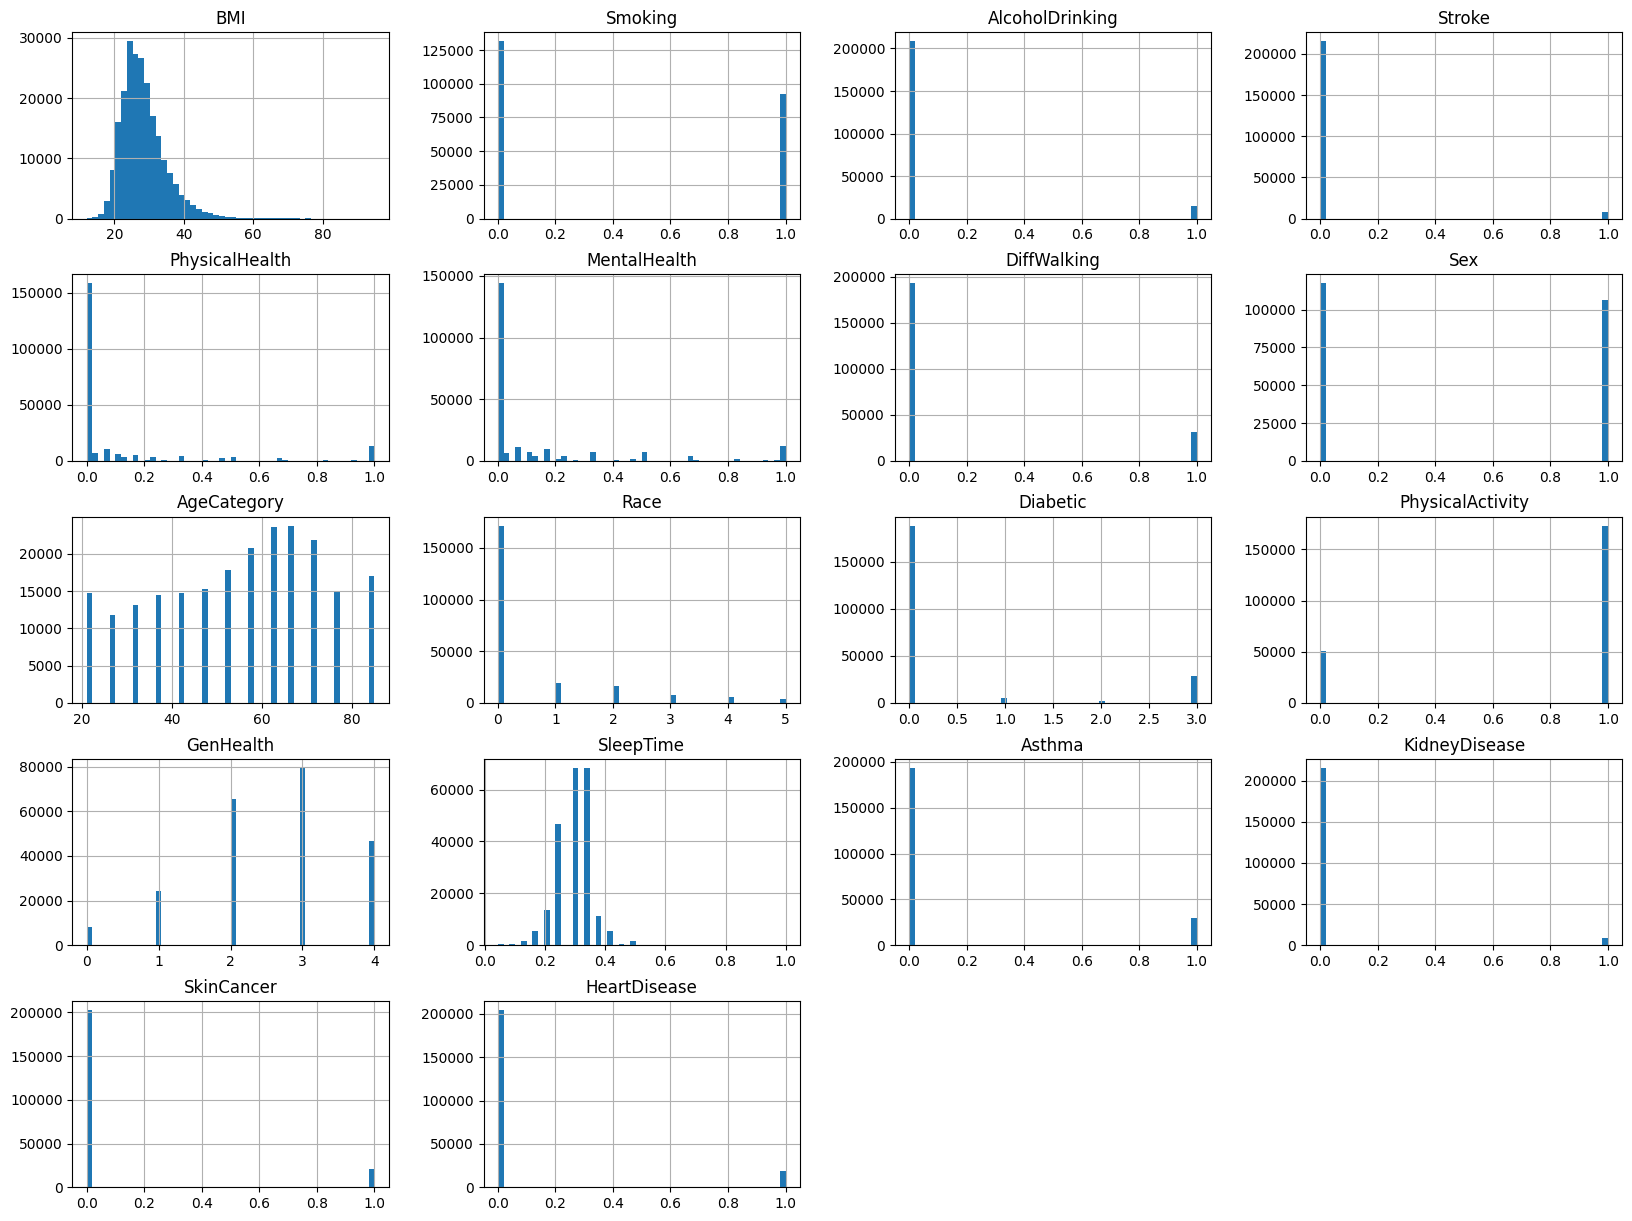

In [130]:
train.hist(bins=50, figsize=(20,15))
plt.show()

# **ANÁLISIS DEMOGRÁFICO**

###### Districbución de sexo en la población

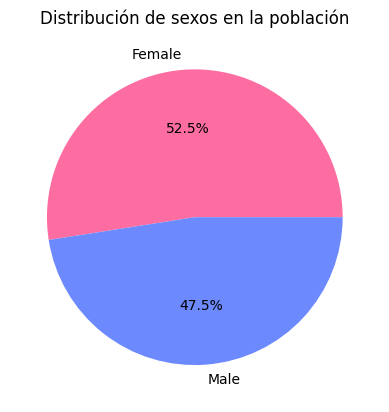

In [131]:
#Gráfica del sexo de la población.
sex_values= train_demografico["Sex"].value_counts()

grupos = sex_values.index
valor = sex_values.values
colorsex = ["#FE6DA2", "#6D89FE"]

fig, ax = plt.subplots()
ax.pie(valor, labels = grupos, colors = colorsex, autopct = '%1.1f%%')
ax.set(title='Distribución de sexos en la población')
plt.show()

Poco más de la mitad de la población es de sexo Femenino.

###### Gráfica de Sexo y Rango de edad

In [132]:
# Contar la cantidad de individuos por sexo y rango de edad
age_sex_counts = train_demografico.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)

# Asegurarse de que 'Age' está ordenado correctamente
age_sex_counts = age_sex_counts.reindex(sorted(age_sex_counts.index), axis=0)

print(age_sex_counts)

Sex          Female   Male
AgeCategory               
18-24          6591   8117
25-29          5519   6251
30-34          6449   6703
35-39          7382   7032
40-44          7704   7054
45-49          8020   7260
50-54          9371   8443
55-59         10865   9971
60-64         12211  11357
65-69         12534  11260
70-74         11982   9814
75-79          8496   6514
80 or older   10318   6638


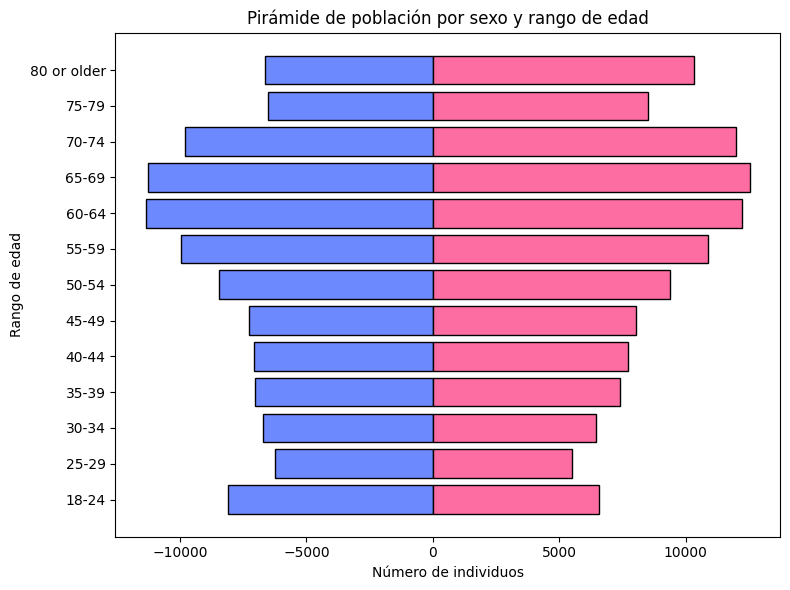

In [133]:
#Gráfica piramidal sexo y edad

y = np.arange(len(age_sex_counts))
x_male = -age_sex_counts['Male'].values
x_female = age_sex_counts['Female'].values

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(y, x_male, color='#6D89FE', edgecolor='black', label='Male')
ax.barh(y, x_female, color='#FE6DA2', edgecolor='black', label='female')
ax.set(yticks=y, yticklabels=age_sex_counts.index, xlabel='Número de individuos', ylabel='Rango de edad', title='Pirámide de población por sexo y rango de edad')
plt.tight_layout()
plt.show()

Podemos visualizar que los rango de edad predominante en la población masculina como femenina de la población está entre 60-69 años de edad.

###### Distribución de raza en la población

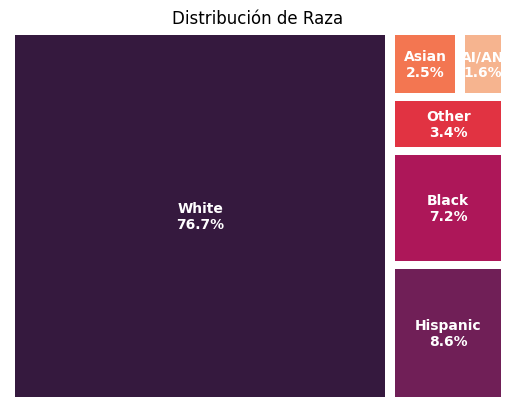

In [134]:
#Gráfica para visualizar la distribución de la raza en la población
race_values = train_demografico["Race"].value_counts()
race_values.index = race_values.index.map(lambda x: 'AI/AN' if x == 'American Indian/Alaskan Native' else x)

grupos_race = race_values.index
valores_race = race_values.values
color_race = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']

total = sum(valores_race)
percentages = [f'{(size / total) * 100:.1f}%' for size in valores_race]

squarify.plot(sizes = valores_race, label=[f'{label}\n{percentage}' for label, percentage in zip(grupos_race, percentages)],
              pad = 0.2,
              color = sb.color_palette("rocket", len(valores_race)),
              text_kwargs={'fontsize': 10, 'color': 'white', 'fontweight': 'bold', 'wrap': True, 'horizontalalignment': 'center'})

plt.title('Distribución de Raza')
plt.axis('off')
plt.show()

La raza predominante de la población es Blanca de hasta un 76.7%.

###### Sexo y Etnicidad

In [135]:
# Contar la cantidad de individuos por sexo y etnicidad
race_sex_counts = train_demografico.groupby(['Race', 'Sex']).size().unstack(fill_value=0)
print(race_sex_counts)

Sex                             Female   Male
Race                                         
American Indian/Alaskan Native    1978   1699
Asian                             2701   2897
Black                             9481   6608
Hispanic                         10241   8992
Other                             3825   3781
White                            89216  82437


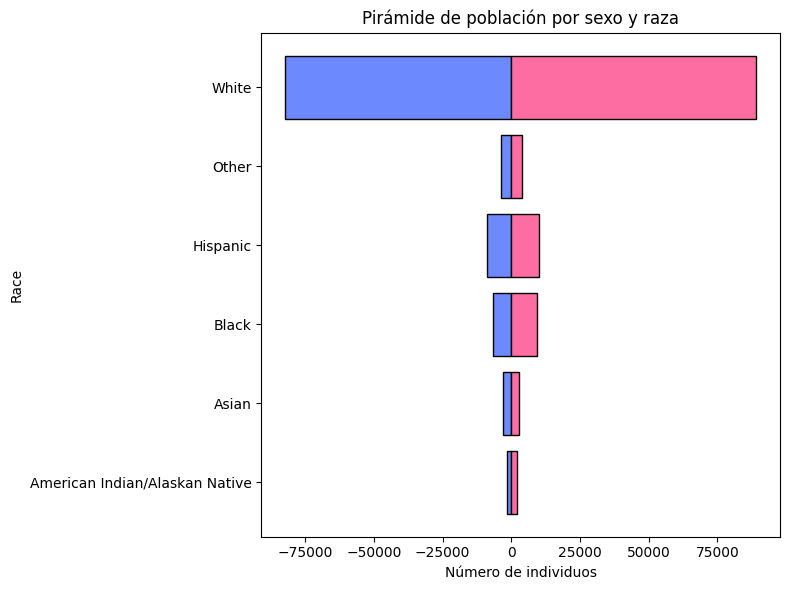

In [136]:
#Gráfica piramidal sexo y raza

y = np.arange(len(race_sex_counts))
x_male = -race_sex_counts['Male'].values
x_female = race_sex_counts['Female'].values

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(y, x_male, color='#6D89FE', edgecolor='black', label='Male')
ax.barh(y, x_female, color='#FE6DA2', edgecolor='black', label='female')
ax.set(yticks=y, yticklabels=race_sex_counts.index, xlabel='Número de individuos', ylabel='Race', title='Pirámide de población por sexo y raza')
plt.tight_layout()
plt.show()

###### Distribución de enferemedades en ambos sexos

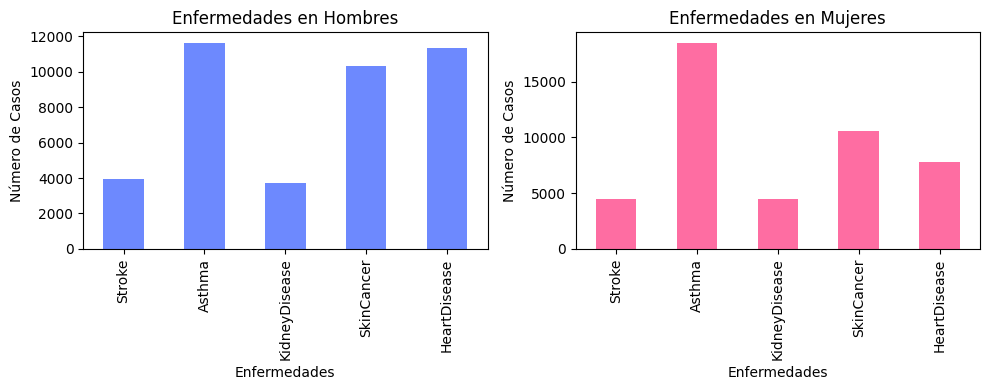

In [137]:
#Gráfica de la districbución de enfermedades en ambos sexos
train_male = train_demografico[train_demografico['Sex'] == 'Male']
train_female = train_demografico[train_demografico['Sex'] == 'Female']

male_diseases = train_male[['Stroke', 'Asthma',
                            'KidneyDisease', 'SkinCancer', 'HeartDisease']].sum()

female_diseases = train_female[['Stroke', 'Asthma',
                                'KidneyDisease', 'SkinCancer', 'HeartDisease']].sum()

fig, ax = plt.subplots(1, 2, figsize =(10, 4))

male_diseases.plot(kind = 'bar', ax = ax[0], color = '#6D89FE')
ax[0].set_title('Enfermedades en Hombres')
ax[0].set_ylabel('Número de Casos')
ax[0].set_xlabel('Enfermedades')

female_diseases.plot(kind = 'bar', ax = ax[1], color = '#FE6DA2')
ax[1].set_title('Enfermedades en Mujeres')
ax[1].set_ylabel('Número de Casos')
ax[1].set_xlabel('Enfermedades')

plt.tight_layout()
plt.show()

Podemos visualizar la frecuencia de enfermedades en ambos sexos. El asma es la enfermedad predominante en ambos géneros. Para el género máculino la segunda enferemedad con mayor frecuencia en los pacientes es una enferemedad cardiaca, mientras que el cáncer de piel es la segunda enferemedad de mayor frecuencia para el género femenino.

# **TENDENCIAS DE LA SALUD RELACIONADAS A LA EDAD**

#### Variación de los indicadores de salud como la salud física, la salud mental y el bienestar general según diferentes grupos de edad.




Observaciones generales:


*   La salud general de los pacientes decrece conforme son la edad de los pacientes aumenta.
*   Los problemas de salud física se hacen presentes en mayor frecuencia en los adultos mayores que en los menores.
*   Los pacientes más jóvenes son más propensos a padecer problemas de salud mental que los pacientes mayores.





**Salud General**

Los valores de Salud general fueron cambiados en el preprocesamiento de variables categoricas a valores numéricas. Las valores son las siguientes:

*   0 = Poor
*   1 = Fair
*   2 = Good
*   3 = Very Good
*   4 = Excellent


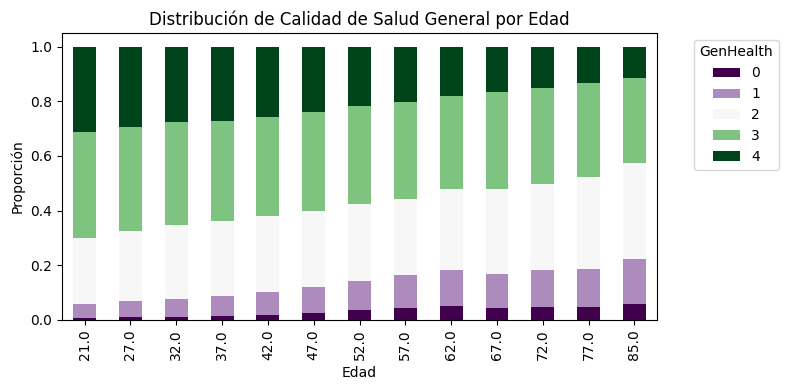

In [138]:
#Agrupación de loos valores de edad y GenHealth
edad_salud_counts = train.groupby(['AgeCategory', 'GenHealth']).size().unstack().fillna(0)
# Normalización de los datos
edad_salud_counts = edad_salud_counts.apply(lambda x: x / x.sum(), axis=1)

#Gráfica
edad_salud_counts.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='PRGn')
plt.xlabel('Edad')
plt.ylabel('Proporción')
plt.title('Distribución de Calidad de Salud General por Edad')
plt.legend(title='GenHealth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Podemos visualuzar como la percepción de la salud general de la población decae al aumentar la edad de los pacientes. En la gráfica podemos ver cómo gran parte de los pacientes con una media de 21 años de edad consideran su estado de salud general como "muy bueno" o hasta "excelente", por lo contrario, conforme aumenta la edad de los pacientes también aumenta la frecuencia de pacientes que perciben su estado como "Pobre" y "Regular".

En conclusión, podemos decir que la edad repercute en la percepcion de bienestar general en la salud de los pacientes, donde los pacientes jóvenes consideran tener un estado de salud en su mayoría como "Muy bueno" y "Excelente", mientras que los pacientes mayores perciben su salud como "Buena", además que la mayor frecuencia de pacientes que consideran su salud como "Pobre" y "Regular" son precisamente adultos de la tercera edad.

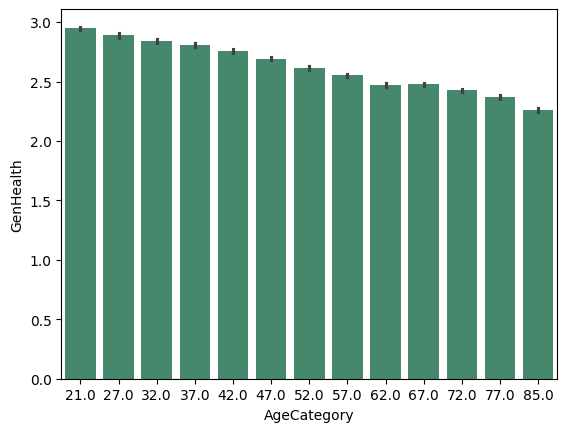

In [139]:
#Promedio general de bienestar general.
sb.barplot(x='AgeCategory', y='GenHealth', data=train, color='#3B936E')
plt.show()

En esta gráfica podemos ver el promedi general del estado de salud de los diferentes pacientes. Los pacientes más jóvenes con una edad promedio de 21 años tiene un promedio de casi 3. es decir, consideran su salud como "Muy buena". Conforme aumenta el promedio de la edad observamos que disminuye el promedio del estado de salud  general, pasando por debajo de un valor de 2.5, por lo que podríamos decir qeu en su mayoría estos pacientes consideran su salud como "Buena".

**Salud física**

En el dataset, la columna de PhysicalHealth indica la cantidad de días que el paciente no se sintió bien físicamente en los últimos 30 días.

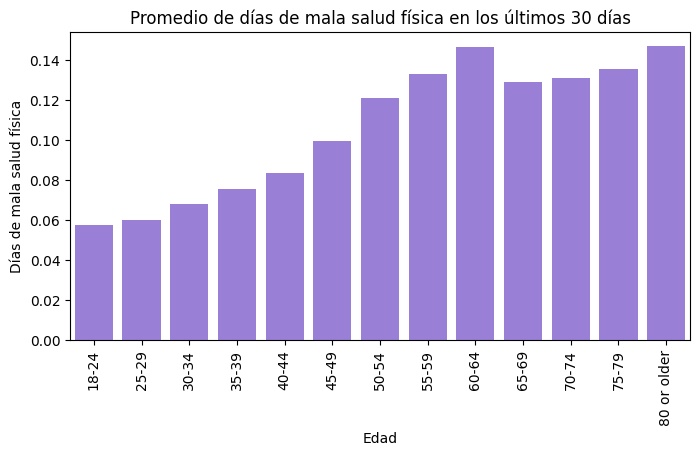

In [140]:
#Promedio de días en los que se sintieron mal los pacientes físicamente
edad_salud_fisica = train_demografico.groupby('AgeCategory')['PhysicalHealth'].mean().reset_index()

# Gráfica
plt.figure(figsize=(8, 4))
sb.barplot(x='AgeCategory', y='PhysicalHealth', data=edad_salud_fisica , color='#9470E6')
plt.xlabel('Edad')
plt.ylabel('Días de mala salud física')
plt.title('Promedio de días de mala salud física en los últimos 30 días')
plt.xticks(rotation=90)
plt.show()

En la gráfica podemos obseervar cómo el promedio de días en los que los pacientes padecieron mala salud física aumenta conforme aumenta la edad. En promedio, los adultos de la tecera edad mayores a 50 años se sintieron mal 12 días o más a lo largo de un mes. Observamos como adultos de entre 60-64 años de edad, y pacientes mayores de 80 años se sintieron mal por cerca de la mitad de un mes. Los pacientes más jovenes menores de 30 años tuvieron un promedio menor a 6 días.

Esta gráfica muestra una clara tendencia positiva entre la edad y los días con padecimiento físico de los pacientes, por lo que podemos concluir que cuanto aumenta  la edad del paciente la cantidad de días en los que se siente mal también aumentan.

**Salud Mental**

En el dataset, la columna de PhysicalHealth indica la cantidad de días que el paciente no se sintió bien mentalmente en los últimos 30 días.

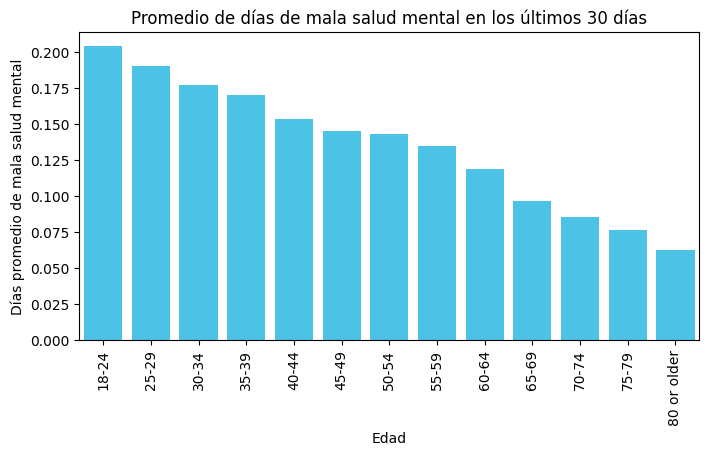

In [141]:
#Promedio de días en los que se sintieron mal los pacientes mentalmente
edad_salud_mental = train_demografico.groupby('AgeCategory')['MentalHealth'].mean().reset_index()

#Gráfica
plt.figure(figsize=(8, 4))
sb.barplot(x='AgeCategory', y='MentalHealth', data=edad_salud_mental, color='#33CFFF')
plt.xlabel('Edad')
plt.ylabel('Días promedio de mala salud mental')
plt.title('Promedio de días de mala salud mental en los últimos 30 días')
plt.xticks(rotation=90)
plt.show()

En la gráfica podemos obseervar cómo el promedio de días en los que los pacientes padecieron mala salud mental es mayor cuando los pacientes son más jóvenes. En promedio, los adultos de la tecera edad mayores a 60 años se sintieron mal mentalmente 12 días o menos a lo largo de un mes. Por el contrario, los pacientes más jovenes menores de 30 años tuvieron un promedio de 18 días o más dentro en menos de un mes en los que consideraron que su salud mental no era buena.

Esta gráfica muestra una clara tendencia negativa entre la edad y el promedio de días en los que los pacientes consideraron su salud mental como mala, por lo que podemos concluir que los problemas de salud mental se presenta en mayor frecuencia dentro de un mismo lapso de tiempo en pacientes más jóvenes que en los pacientes mayores.

### Tendencias y patrones relacionados con la edad en el conjunto de datos

**Correlaciones en variables numéricas**

***Resumen:***


*   Las 3 variables que mostraron una fuerte correlación positiva fueron **SkinCancer** donde el riesgo de contraer esta enfermedad aumenta significativamente conforma aumenta la edad, **DiffWalking** se observa que los pacientes mayores son más propensos a tener problemas para caminar o subir escaleras, y **HeartDisease** que nos indica que las enferemedades cardiovasculares también se encuentran en mayor frecuencia en adultos mayores que en pacientes jóvenes. Otras variables con correlación positiva son **Stroke** que nos muestra que las personas mayores tienen mayor probabilidad a sufrir un accidente cerebrovascular, con **KidneyDisease** que la probabilidad a sufrir problemas de hígado aumenta con la edad, **SleepTime** porque las personas mayores durmen más que las menores,**Smoking** donde nos muestra que las personas mayores fuman más que los menores, y PhysicalHealth que nos indica que los pacientes mayores padecen mayores dificultades físicas que los menores.

*   Se encontró una relación casi inexistente con el BMI, esto indica que el ínidice de masa corporal no tinene nula o casi nula relación con la edad.

*   Las 3 variables que mostraron una fuerte correlación negativa fueron **MentalHealth** que muestra que los pacientes más jóvenes son los más afectados en su salud mental, **GenHealth** donde el promedio de salud general en edades jóvenes es mayor y que tiende a disminuir en edades avanzadas, y **PhysicalActivity** donde la actividad física es realizada con mayor frecuencia en pacientes jóvenes.  Otras  variables con correlación negativa aunque en mucho menor medida fueron **Asthma** que nos muestra que los pacientes jóvenes son más propensos al asma que los ancainos, y **AlcoholDrinking** debido a que el consumo de alcohol es mayor en edades más jóvenes que en pacientes mayores.

In [142]:
# Definir si vamos a trabajar con pruebas paramétricas o no paramétricas según si los datos estan normalizados
stat, p = shapiro(train['AgeCategory'])
print(f'Estadístico: {stat}, p-valor: {p}')
alpha = 0.05
if p > alpha:
  print('normalizada')
else:
  print('no normalizada')

Estadístico: 0.9567680358886719, p-valor: 0.0
no normalizada


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


No están normalizados, y después de pruebas para la normalización de los valores con boxcox y yeojohnson se encontró que no afectaba la correlación, por lo que trabajaremos las correlaciones con pruebas no paramétricas debido a que no están normalizados.

In [143]:
#Uso de Spearman para datos no paramétricos cuantitativos
corr_spearman=train.corr(method='spearman')
corr_spearman['AgeCategory'].sort_values(ascending=False)

AgeCategory         1.000000
SkinCancer          0.272731
DiffWalking         0.242474
HeartDisease        0.238211
Diabetic            0.206808
Stroke              0.139140
KidneyDisease       0.124286
SleepTime           0.123362
Smoking             0.121716
PhysicalHealth      0.057047
BMI                 0.006148
Asthma             -0.054623
AlcoholDrinking    -0.064066
Sex                -0.064497
PhysicalActivity   -0.121308
GenHealth          -0.185199
Race               -0.187024
MentalHealth       -0.231588
Name: AgeCategory, dtype: float64

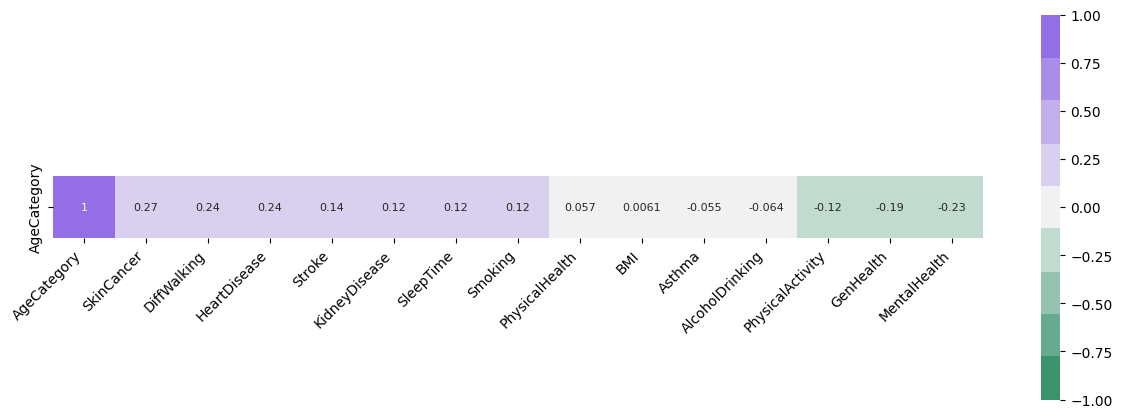

In [144]:
selected_corr = corr_spearman.loc[['AgeCategory'], ['AgeCategory','SkinCancer', 'DiffWalking', 'HeartDisease', 'Stroke',
                                                    'KidneyDisease', 'SleepTime', 'Smoking', 'PhysicalHealth', 'BMI',
                                                    'Asthma', 'AlcoholDrinking','PhysicalActivity','GenHealth', 'MentalHealth']]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
custom_palette = sb.diverging_palette(150, 275, s=80, l=55, n=9)

sb.heatmap(
    selected_corr,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = custom_palette,
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,

    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

**Visualización de las 3 variables con correlación positiva más notoria**

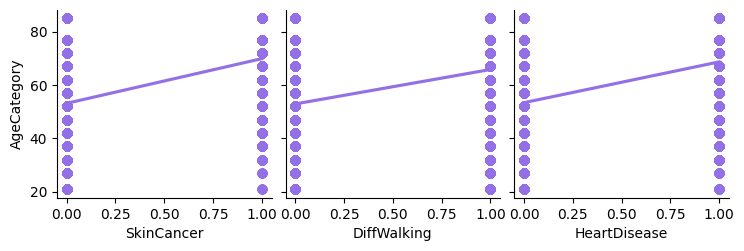

In [145]:
sb.pairplot(train,
            x_vars=['SkinCancer', 'DiffWalking', 'HeartDisease'],
            y_vars='AgeCategory',
            kind='reg',
            plot_kws={'color': '#9470E6'})
plt.show()

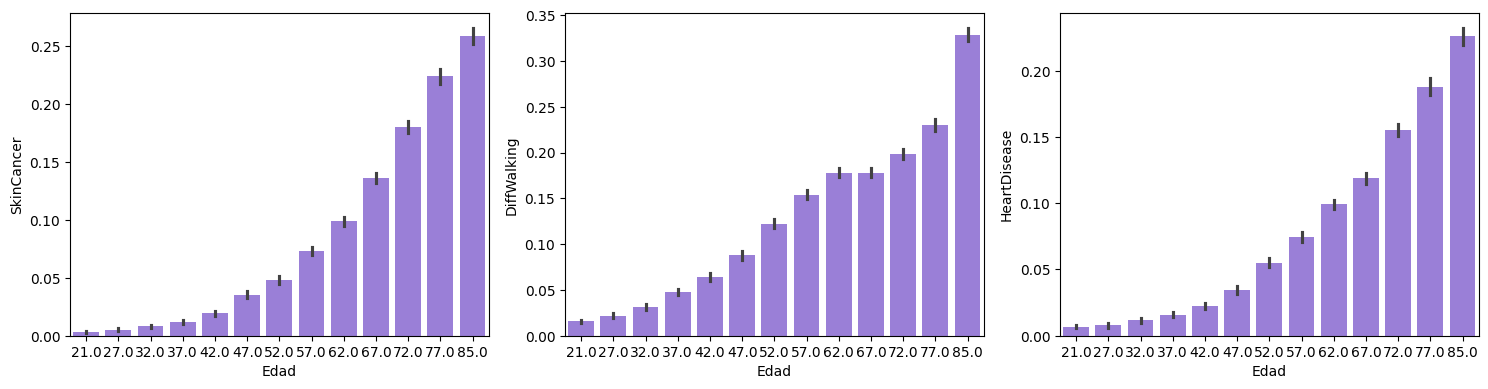

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=5.0)

sb.barplot(x='AgeCategory', y='SkinCancer', data=train, color='#9470E6', ax= axes[0] )
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('SkinCancer')

sb.barplot(x='AgeCategory', y='DiffWalking', data=train, color='#9470E6', ax= axes[1])
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('DiffWalking')

sb.barplot(x='AgeCategory', y='HeartDisease', data=train, color='#9470E6', ax= axes[2])
axes[2].set_xlabel('Edad')
axes[2].set_ylabel('HeartDisease')

plt.tight_layout()
plt.show()



*   ***SkinCancer:*** Se visualiza una tendencia positiva muy notoria entre la edad de los pacientes y su riesgo a contrar piel de cáncer. Los pacientes jóvenes tienen menor riesgo, mientras que para las personas de edades avanzadas el riesgo aumenta significativamente.

*   ***DiffWalking:*** Es visible como los pacientes mayores son más propensos a tener problemas para caminar o subir escaleras . Onbservamos una tendencia claramente positiva donde esta problematica se presenta en mayor frecuencia conforme aumenta la edad.

*   ***HeartDisease:*** Las enferemedades cardiovasculares también se encuentran en mayor frecuencia en adultos mayores que en pacientes jóvenes. Existe una correlación positiva que muestra el aumento del riesgo de padecer una enfermedad cardiaca al pasar de los años.

**Visualización de las 3 variables con correlación negativa más notoria**

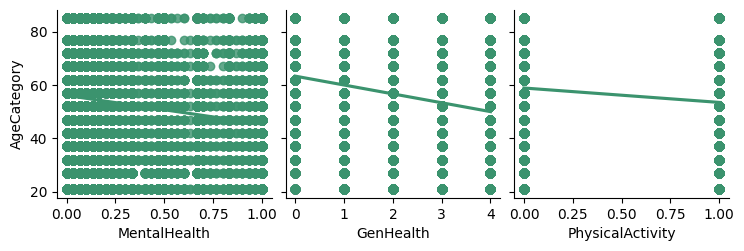

In [147]:
sb.pairplot(train,
            x_vars=['MentalHealth', 'GenHealth', 'PhysicalActivity'],
            y_vars='AgeCategory',
            kind='reg',
            plot_kws={'color': '#3B936E'})
plt.show()

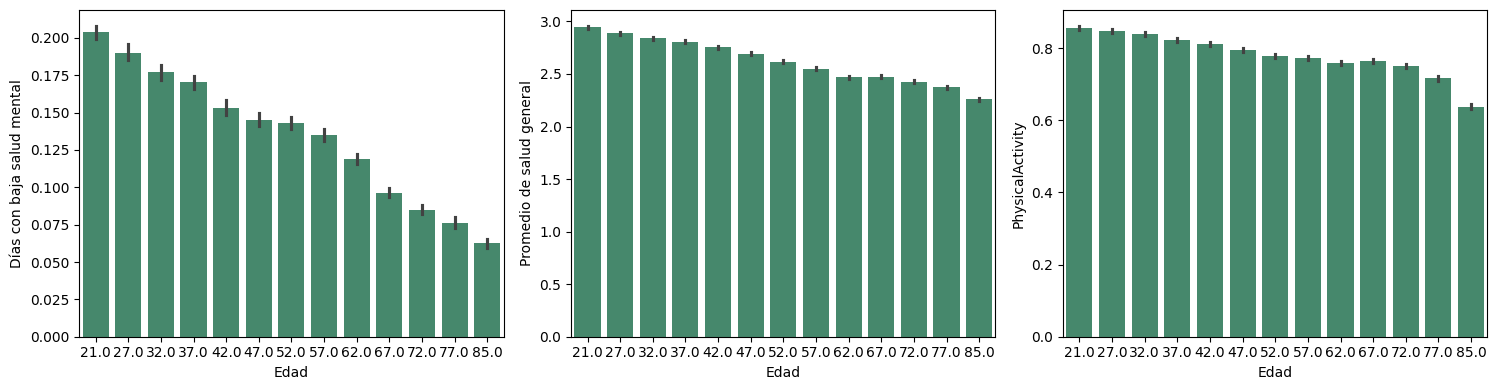

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.tight_layout(pad=5.0)

sb.barplot(x='AgeCategory', y='MentalHealth', data=train, color='#3B936E', ax= axes[0] )
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Días con baja salud mental')

sb.barplot(x='AgeCategory', y='GenHealth', data=train, color='#3B936E', ax= axes[1])
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Promedio de salud general')

sb.barplot(x='AgeCategory', y='PhysicalActivity', data=train, color='#3B936E', ax= axes[2])
axes[2].set_xlabel('Edad')
axes[2].set_ylabel('PhysicalActivity')

plt.tight_layout()
plt.show()



*   ***MentalHealth:*** Como se describió anteriormente, los pacientes más jóvenes son los más afectados en su salud mental, mientras que los más grandes se ven menos afectado. En promedio los pacientes menores a 30 años suelen no sentirse bien emocionalmente más de dos semanas al mes.

*   ***GenHealth:*** Es visible como disminuye el estado general de los pacientes conforme aumenta la edad de los pacientes. Recordando que 4 es el valor que representa excellente, y 0 rerpesenta un etado de salud pobre, vemos como tiene a aumentar el promedio de salud general en edades jóvenes y a disminuir en edades avanzadas.

*   ***PhysicalActivity:*** Se observa una clara tendencia entre la actividad física y la edad. La grafica nos muetsra una correlación negativa, en ella observamos como la actividad física es realizada con mayor frecuencia en pacientes jóvenes, por el contrario la frecuencia de esta actividad baja constantemente conforme la edad de los pacientes aumenta.

***Correlaciones entre Edad y variables categóricas (Diabetes)***

**Resumen:**



*   La diabetes muestra una correlación positiva, en donde el riesgo de diabetes aumenta con la edad, con la excepción de la diabetes gestacional que se concentra en edades más jóvenes.

In [149]:
train_cat = train[["AgeCategory", "Diabetic"]]
train_cat.head()

,AgeCategory,Diabetic
0,37.0,0
1,32.0,0
2,52.0,0
3,32.0,0
4,67.0,0


**Diabetes**

Se utilizó el método de Kruskal-Wallis para comparar los valores mixtos.
Recordando que las categorías de diabetes son las siguientes:

*   Grupo 0 = No diabetes
*   Grupo 1 = Prediabetes
*   Grupo 2 = Diabetes gestional
*   Grupo 3 = Sí Diabetes



In [150]:
#División de grupos para diabetes
diabetic_g0 = train_cat[train_cat['Diabetic'] == 0]['AgeCategory']
diabetic_g1 = train_cat[train_cat['Diabetic'] == 1]['AgeCategory']
diabetic_g2 = train_cat[train_cat['Diabetic'] == 2]['AgeCategory']
diabetic_g3 = train_cat[train_cat['Diabetic'] == 3]['AgeCategory']

kruskal_stat, p_value = kruskal(diabetic_g0, diabetic_g1, diabetic_g2, diabetic_g3)
print(f"Valor de p: {p_value}")

if p_value < 0.05:
  print("Hay una diferencia significativa entre los grupos de diabetes.")
else:
  print("No hay una diferencia significativa entre los grupos de diabetes.")

Valor de p: 0.0
Hay una diferencia significativa entre los grupos de diabetes.


Observamos que hay una diferencia significativa entre los grupos y la edad, por lo que se graficarán para observar mejor esta relación.

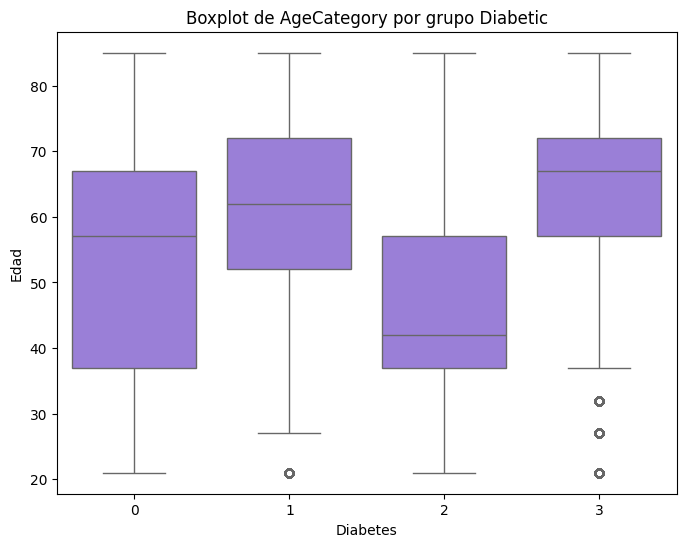

In [151]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='Diabetic', y='AgeCategory', data=train_cat, color= '#9470E6')
plt.xlabel('Diabetes')
plt.ylabel('Edad')
plt.title('Boxplot de AgeCategory por grupo Diabetic')
plt.show()

*   Grupo 0 (No Diabetes):
Tiene una amplia distribución de edades
*   Grupo 1 (Prediabetes):
Se visualiza que tiene una tendencia a edades más avanzadas
*   Grupo 2 (Diabetes gestional):
Se agrupa en edades más jovenes, esto debido a que se relaciona con el embarazo, por lo que podríamos intuir que se reelaciona con las edades reproductivas.
*   Grupo 3 (Diabetes):
Tiene una tenencia a edades más avanzadas.

En forma general observamos una tendencia de los casos de diabetes con la edad a excepción del grupo 2.
EL grupo 0 tiene mayor distribución de edades y observamos que no está muy presente la diabetes en jóvenes. Condorme aumenta la edad podemos observar que la frecuencia de personas con prediabetes aumenta con una mediana superior a los que no tinen. Finalmente en el grupo 3 obrservamos la mediana más grande y a la vez una mayor agrupación de casos de personas con diabetes en personas de la tercera edad, por lo que podemos concluir que existe una correlación positiva de la diabetes y la edad, por lo que el riesgo de diabetes aumenta con la edad.

Esta conclusión deja de lado al grupo 2, que muestra una diabetes gestacional que se concentra en edades más jóvenes debido a su etapa reprocutiva.

### Cambios de la prevalencia de enfermedades crónicas respecto a la edad.

In [152]:
col_enfermedades_cronicas = ['Stroke', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease', 'AgeCategory']
enfermedades_cr = train_demografico[col_enfermedades_cronicas]
enfermedades_cr.head()

,Stroke,Asthma,KidneyDisease,SkinCancer,HeartDisease,AgeCategory
0,0,0,0,0,0,35-39
1,0,0,0,0,0,30-34
2,0,0,0,0,0,50-54
3,0,0,0,0,0,30-34
4,0,1,0,0,0,65-69


In [153]:
# Contar la prevalencia de cada enfermedad crónica por grupo de edad
prevalencia_por_edad = enfermedades_cr.groupby('AgeCategory').mean() * 100  # Convertir a porcentaje

# Mostrar los resultados
print(prevalencia_por_edad)

               Stroke     Asthma  KidneyDisease  SkinCancer  HeartDisease
AgeCategory                                                              
18-24        0.312755  17.589067       0.611912    0.319554      0.679902
25-29        0.535259  16.771453       0.696686    0.526763      0.790144
30-34        0.760341  15.260036       0.851582    0.805961      1.155718
35-39        0.950465  13.854586       1.227973    1.221035      1.588733
40-44        1.368749  14.473506       1.829516    1.937932      2.229299
45-49        1.910995  14.469895       2.087696    3.560209      3.462042
50-54        2.599079  13.685865       2.851690    4.805209      5.495678
55-59        3.772317  13.390286       3.335573    7.309464      7.463045
60-64        4.374576  13.306178       4.103021    9.873557      9.911745
65-69        4.925611  12.347651       4.980247   13.629486     11.876944
70-74        6.051569  11.896678       6.391081   18.030831     15.544137
75-79        7.868088  11.465690      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '18-24'),
  Text(1, 0, '25-29'),
  Text(2, 0, '30-34'),
  Text(3, 0, '35-39'),
  Text(4, 0, '40-44'),
  Text(5, 0, '45-49'),
  Text(6, 0, '50-54'),
  Text(7, 0, '55-59'),
  Text(8, 0, '60-64'),
  Text(9, 0, '65-69'),
  Text(10, 0, '70-74'),
  Text(11, 0, '75-79'),
  Text(12, 0, '80 or older')])

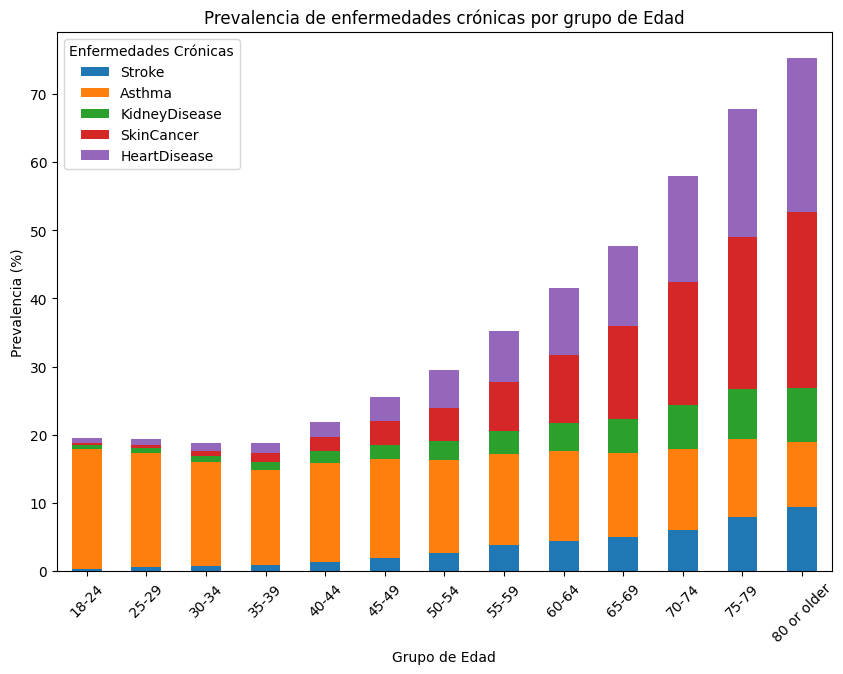

In [154]:
prevalencia_por_edad.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Prevalencia de enfermedades crónicas por grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Prevalencia (%)')
plt.legend(title='Enfermedades Crónicas')
plt.xticks(rotation=45)

A medida que aumenta la edad, generalmente se observa un aumento en la prevalencia de todas estas enfermedades crónicas a excepción del Asma.

 Por ejemplo, el cáncer de piel y las enfermedades cardíacas tienden a aumentar significativamente en los grupos de edad más avanzados de 0.67 a 22.58% en problemas de corazón y de 0.31 a 25.89% en el cancer de piel. De igual forma aunque en menor medida, los porcentajes de pacientes con padecimientos cerebrovasculares y  problemas de hígado aumentan con respecto a la edad.

 El caso contrario es el Asma, que se encuentra en mayor medido en rangos de edad jóvenes y su presencia diminuye en rangos de edad de adultos mayores como se visualiza con 17.58% en jovenes de 18-24 años y un 9.43 en adultos con un rango de 80 años o más.

# **MODELO**

In [ ]:
corr_spearman['HeartDisease'].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.238095
DiffWalking         0.200191
Stroke              0.195813
Diabetic            0.173577
KidneyDisease       0.144639
PhysicalHealth      0.141512
Smoking             0.107616
SkinCancer          0.094649
Sex                 0.071131
BMI                 0.055287
Asthma              0.041152
SleepTime           0.007024
MentalHealth       -0.003722
AlcoholDrinking    -0.030808
Race               -0.036909
PhysicalActivity   -0.100379
GenHealth          -0.224534
Name: HeartDisease, dtype: float64

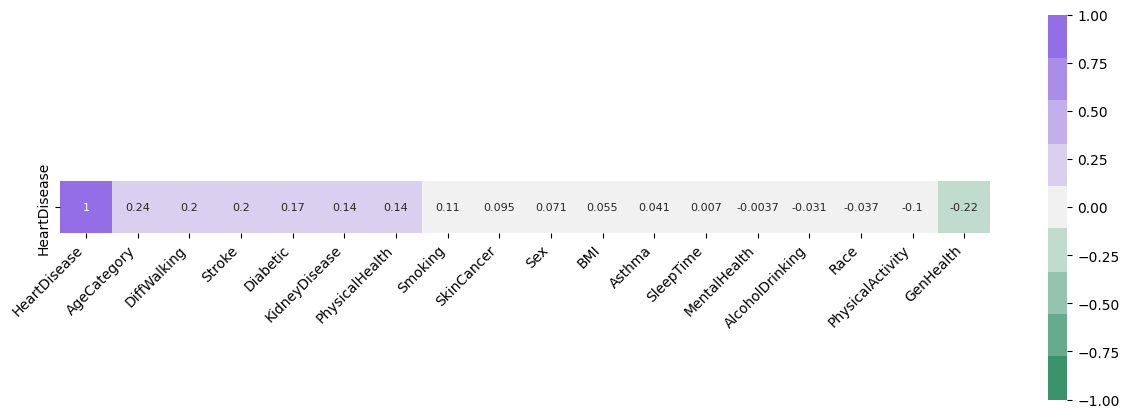

In [ ]:
selected_corr = corr_spearman.loc['HeartDisease'].sort_values(ascending=False)
selected_corr_heart = selected_corr.to_frame().T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
custom_palette = sb.diverging_palette(150, 275, s=80, l=55, n=9)

sb.heatmap(
    selected_corr_heart,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = custom_palette,
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,

    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

array([[<Axes: xlabel='HeartDisease', ylabel='HeartDisease'>,
        <Axes: xlabel='AgeCategory', ylabel='HeartDisease'>,
        <Axes: xlabel='DiffWalking', ylabel='HeartDisease'>,
        <Axes: xlabel='Stroke', ylabel='HeartDisease'>,
        <Axes: xlabel='Diabetic', ylabel='HeartDisease'>,
        <Axes: xlabel='GenHealth', ylabel='HeartDisease'>],
       [<Axes: xlabel='HeartDisease', ylabel='AgeCategory'>,
        <Axes: xlabel='AgeCategory', ylabel='AgeCategory'>,
        <Axes: xlabel='DiffWalking', ylabel='AgeCategory'>,
        <Axes: xlabel='Stroke', ylabel='AgeCategory'>,
        <Axes: xlabel='Diabetic', ylabel='AgeCategory'>,
        <Axes: xlabel='GenHealth', ylabel='AgeCategory'>],
       [<Axes: xlabel='HeartDisease', ylabel='DiffWalking'>,
        <Axes: xlabel='AgeCategory', ylabel='DiffWalking'>,
        <Axes: xlabel='DiffWalking', ylabel='DiffWalking'>,
        <Axes: xlabel='Stroke', ylabel='DiffWalking'>,
        <Axes: xlabel='Diabetic', ylabel='DiffWalking'

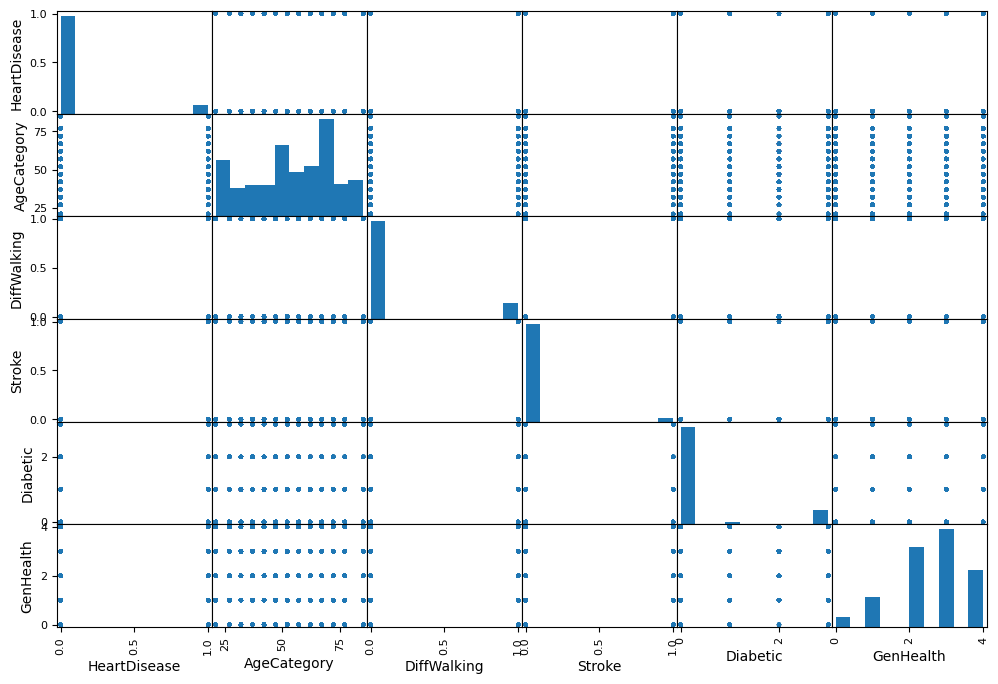

In [ ]:
attributes = ["HeartDisease", "AgeCategory", "DiffWalking",
              "Stroke", "Diabetic", "GenHealth"]
scatter_matrix(train[attributes], figsize=(12, 8))

In [155]:
train['HeartDisease'] = train['HeartDisease'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223856 entries, 0 to 223855
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               223856 non-null  float64
 1   Smoking           223856 non-null  int64  
 2   AlcoholDrinking   223856 non-null  int64  
 3   Stroke            223856 non-null  int64  
 4   PhysicalHealth    223856 non-null  float64
 5   MentalHealth      223856 non-null  float64
 6   DiffWalking       223856 non-null  int64  
 7   Sex               223856 non-null  int64  
 8   AgeCategory       223856 non-null  float64
 9   Race              223856 non-null  int64  
 10  Diabetic          223856 non-null  int64  
 11  PhysicalActivity  223856 non-null  int64  
 12  GenHealth         223856 non-null  int64  
 13  SleepTime         223856 non-null  float64
 14  Asthma            223856 non-null  int64  
 15  KidneyDisease     223856 non-null  int64  
 16  SkinCancer        22

###***REGRESIÓN LINEAL***

In [156]:
X = train[["SkinCancer", "DiffWalking", "Diabetic", "Stroke", "KidneyDisease", "SleepTime",
            "Smoking", "PhysicalHealth", "BMI", "Asthma", "AlcoholDrinking", "Sex",
            "PhysicalActivity", "GenHealth", "Race", "MentalHealth"]]

y = train["HeartDisease"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [157]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [158]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred )

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")


Train MSE: 0.0685005443311546
Test MSE: 0.06876597115548937
Train R2: 0.12481633856826335
Test R2: 0.12135542445638214


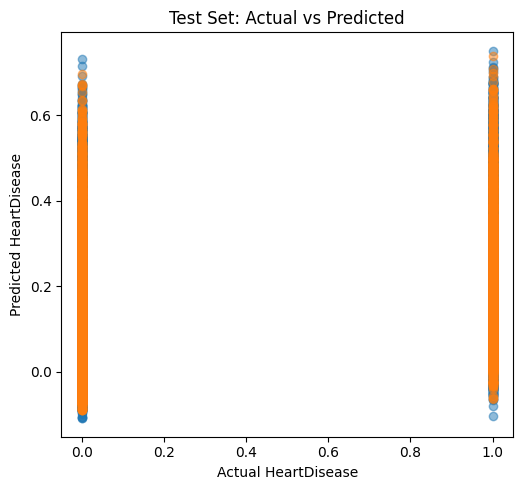

In [159]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel('Actual HeartDisease')
plt.ylabel('Predicted HeartDisease')
plt.title('Train Set: Actual vs Predicted')

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual HeartDisease')
plt.ylabel('Predicted HeartDisease')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

###***DecisionTreeClassifier***

Se realizaron dos acciones a continuación:
*   Uso de undersampler para que la categoría de heartDisease esté balanceada.
*   Omisión de Sleeptime y MentalHealth para el entrenamiento del modelo.

**Significado de las métricas**

*   Precision: indica la proporción de predicciones positivas que fueron correctas.

*   Recall: El recall (o sensibilidad) indica la proporción de ejemplos positivos que fueron correctamente identificados por el modelo.

*   F1-score: Proporciona una medida única de la precisión del modelo, teniendo en cuenta tanto falsos positivos como falsos negativos.

*   Support: Es el número de ocurrencias reales de cada clase en el conjunto de datos.


###RandomForestClassifier

Divisiónde datos

In [160]:
X = train[["SkinCancer", "DiffWalking", "Diabetic", "Stroke", "KidneyDisease",
            "Smoking", "PhysicalHealth", "BMI", "Asthma", "AlcoholDrinking", "Sex",
            "PhysicalActivity", "GenHealth", "Race"]]

y = train["HeartDisease"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Aplica unsersampler debido a que las clases de HeartDisease estaba muy desbalanceada. Por lo que se quitaron filas de NO Heart Disease.

In [161]:
#Undersampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
#reemplazo
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='HeartDisease')
print(y_resampled.value_counts())

HeartDisease
0    19161
1    19161
Name: count, dtype: int64


In [162]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Dimensiones de los conjuntos
print(f'Tamaño de X_train: {X_train.shape}, Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}, Tamaño de y_test: {y_test.shape}')


Tamaño de X_train: (30657, 14), Tamaño de X_test: (7665, 14)
Tamaño de y_train: (30657,), Tamaño de y_test: (7665,)


In [163]:
# Modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [164]:
# Reporte de clasificación en train
print("Reporte de clasificación en train:")
print(classification_report(y_train, y_train_pred))

# Reporte de clasificación en test
print("Reporte de clasificación en test:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión en test
print("Confusion Matrix test:")
print(confusion_matrix(y_test, y_test_pred))

# Exactitud en train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Reporte de clasificación en train:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     15338
           1       0.97      0.95      0.96     15319

    accuracy                           0.96     30657
   macro avg       0.96      0.96      0.96     30657
weighted avg       0.96      0.96      0.96     30657

Reporte de clasificación en test:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      3823
           1       0.68      0.69      0.68      3842

    accuracy                           0.68      7665
   macro avg       0.68      0.68      0.68      7665
weighted avg       0.68      0.68      0.68      7665

Confusion Matrix test:
[[2599 1224]
 [1210 2632]]
Train Accuracy: 0.9620641289102
Test Accuracy: 0.6824527071102413


###RandomForestClassifie + Cv + Mejores parametros con grid_Search

Mejores estimaciones previamente calculadas con grid_Search

In [165]:
n_estimators = [200]  # Número de árboles en el bosque
max_depth = [10]  # Profundidad máxima de cada árbol
min_samples_split = [10]  # Número mínimo de muestras requeridas para dividir un nodo
min_samples_leaf = [4]  # Número mínimo de muestras requeridas en cada hoja del árbol

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}


In [166]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [167]:
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor score de validación cruzada:")
print(grid_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mejor score de validación cruzada:
0.7294260462187658


In [168]:
# modelo con los mejores hiperparámetros encontrados
best_rf = grid_search.best_estimator_

# Hacer predicciones
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# clasificación en train
print("Reporte de clasificación en train:")
print(classification_report(y_train, y_train_pred))

# clasificación en test
print("Reporte de clasificación en test:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión en test
print("Confusion Matrix test:")
print(confusion_matrix(y_test, y_test_pred))

# Exactitud en train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Reporte de clasificación en train:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     15338
           1       0.74      0.74      0.74     15319

    accuracy                           0.74     30657
   macro avg       0.74      0.74      0.74     30657
weighted avg       0.74      0.74      0.74     30657

Reporte de clasificación en test:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      3823
           1       0.73      0.71      0.72      3842

    accuracy                           0.72      7665
   macro avg       0.72      0.72      0.72      7665
weighted avg       0.72      0.72      0.72      7665

Confusion Matrix test:
[[2810 1013]
 [1121 2721]]
Train Accuracy: 0.7421796000913331
Test Accuracy: 0.7215916503587736


###***MEjor modelo***
RandomForestClassifie + CV + Regularización .

Se utilizaron varios parametros para encontrar la mejor combinación y la mejor combinación es con 10 en max_deep y 200 en el n_estiamtors, por lo que ya se sustituyeron directamente.

In [169]:
param_grid = {
    'n_estimators': [200],
    'max_depth': [10]
}

# Inicializar GridSearchCV
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [170]:
# clasificación en train
y_train_pred = best_model.predict(X_resampled)
print("Reporte de clasificación en train:")
print(classification_report(y_resampled, y_train_pred))

# en test
y_test_pred = best_model.predict(X_test)
print("Reporte de clasificación en test:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión en test
print("Confusion Matrix test:")
print(confusion_matrix(y_test, y_test_pred))

# Exactitud en train y test
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Mostrar mejores parámetros y puntaje de validación cruzada
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Puntaje de validación cruzada: {grid_search.best_score_}")

Reporte de clasificación en train:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     19161
           1       0.75      0.74      0.74     19161

    accuracy                           0.74     38322
   macro avg       0.74      0.74      0.74     38322
weighted avg       0.74      0.74      0.74     38322

Reporte de clasificación en test:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      3823
           1       0.74      0.73      0.73      3842

    accuracy                           0.74      7665
   macro avg       0.74      0.74      0.74      7665
weighted avg       0.74      0.74      0.74      7665

Confusion Matrix test:
[[2862  961]
 [1053 2789]]
Train Accuracy: 0.7431240540681593
Test Accuracy: 0.7372472276581865
Mejores parámetros encontrados: {'max_depth': 10, 'n_estimators': 200}
Puntaje de validación cruzada: 0.7260839471774068


###Modelo de Gradient Boosting.

In [171]:
#modelo
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

#predicciones
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

In [172]:
# Métricas de evaluación
print("Reporte de clasificación en train:")
print(classification_report(y_train, y_train_pred))

print("Reporte de clasificación en test:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix test:")
print(confusion_matrix(y_test, y_test_pred))

# Validación cruzada
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)
print(f"Puntajes de validación cruzada: {cv_scores}")
print(f"Media del puntaje de validación cruzada: {cv_scores.mean()}")

Reporte de clasificación en train:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74     15338
           1       0.74      0.72      0.73     15319

    accuracy                           0.73     30657
   macro avg       0.73      0.73      0.73     30657
weighted avg       0.73      0.73      0.73     30657

Reporte de clasificación en test:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      3823
           1       0.74      0.70      0.72      3842

    accuracy                           0.73      7665
   macro avg       0.73      0.73      0.73      7665
weighted avg       0.73      0.73      0.73      7665

Confusion Matrix test:
[[2853  970]
 [1136 2706]]
Puntajes de validación cruzada: [0.71542727 0.72700587 0.72076333 0.74017289 0.73821563]
Media del puntaje de validación cruzada: 0.7283169977772749


###GradientBoosting +  cambio de hiperparámetros

In [173]:
#Separación de lso datos y balanceo de la clase con undersampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [174]:
#Modelo
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, random_state=42)
gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

cv_scores = cross_val_score(gb_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Puntajes de Validación Cruzada: {cv_scores}")
print(f"Puntaje de Validación Cruzada Promedio: {cv_scores.mean()}")

Puntajes de Validación Cruzada: [0.72759295 0.73255055 0.71868476 0.72677453 0.7216858 ]
Puntaje de Validación Cruzada Promedio: 0.7254577206808597


In [175]:
# Métricas de evaluación
print("Reporte de clasificación en train:")
print(classification_report(y_train, y_train_pred))

print("Reporte de clasificación en test:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix test:")
print(confusion_matrix(y_test, y_test_pred))

Reporte de clasificación en train:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76     15338
           1       0.76      0.75      0.76     15319

    accuracy                           0.76     30657
   macro avg       0.76      0.76      0.76     30657
weighted avg       0.76      0.76      0.76     30657

Reporte de clasificación en test:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3823
           1       0.73      0.71      0.72      3842

    accuracy                           0.72      7665
   macro avg       0.72      0.72      0.72      7665
weighted avg       0.72      0.72      0.72      7665

Confusion Matrix test:
[[2822 1001]
 [1112 2730]]


###SVM